In [45]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Data input
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [46]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [47]:
print df.shape[0], df.shape[1]

1728 7


In [48]:
num_columns = df.shape[1]
map_dic = {}

# 모든 feature에 대한 mapping (Numerical data 변환)
# Mission 1: 모든 속성들을 수치형 데이터로 변환
for i in all_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    

In [49]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [50]:
map_dic

{'buying': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
 'eval': {'acc': 1, 'good': 3, 'unacc': 0, 'vgood': 2},
 'log_boot': {'big': 2, 'med': 1, 'small': 0},
 'maint': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'persons': {'2': 0, '4': 1, 'more': 2},
 'safety': {'high': 2, 'low': 0, 'med': 1}}

In [51]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [52]:
# Data normalization
for i in feature_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)
    df[i] = df[i].map(map_dic_sub)

In [53]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0.000000,0.0,0.0,0.0,0
1,0,0,0.000000,0.0,0.0,0.5,0
2,0,0,0.000000,0.0,0.0,1.0,0
3,0,0,0.000000,0.0,0.5,0.0,0
4,0,0,0.000000,0.0,0.5,0.5,0
5,0,0,0.000000,0.0,0.5,1.0,0
6,0,0,0.000000,0.0,1.0,0.0,0
7,0,0,0.000000,0.0,1.0,0.5,0
8,0,0,0.000000,0.0,1.0,1.0,0
9,0,0,0.000000,0.5,0.0,0.0,0


In [54]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.417245
std,0.372786,0.372786,0.372786,0.408366,0.408366,0.408366,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,0.750000,0.750000,0.750000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [55]:
# Mission 2: Target 4개별로 grouping -> 속성별 기본 통계치 및 Box plot 

# Target 별 gorupping
df_unacc = df[df['eval'] == 0]
df_acc = df[df['eval'] == 1]
df_good = df[df['eval'] == 2]
df_vgood = df[df['eval'] == 3]

In [56]:
df_unacc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210
mean,0.450138,0.455647,0.484848,0.395041,0.466116,0.376446,0
std,0.372700,0.375849,0.375717,0.417930,0.409877,0.401382,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
50%,0.333333,0.333333,0.333333,0.500000,0.500000,0.500000,0
75%,0.666667,0.666667,0.666667,1.000000,1.000000,0.500000,0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


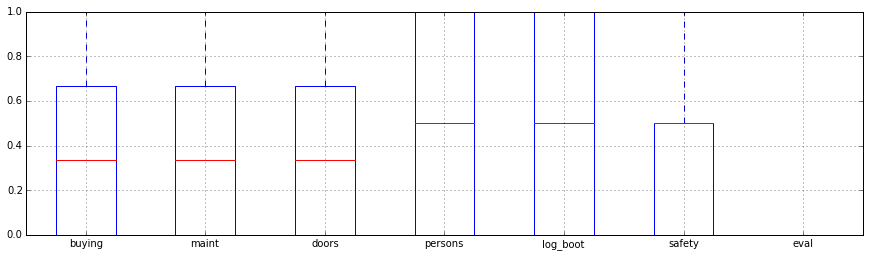

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_unacc.boxplot(ax=ax)
plt.show()

In [58]:
df_acc.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384
mean,0.525174,0.530382,0.528646,0.742188,0.550781,0.765625,1
std,0.347318,0.349400,0.364975,0.250204,0.399934,0.249837,0
min,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,1
25%,0.333333,0.333333,0.333333,0.500000,0.000000,0.500000,1
50%,0.666667,0.666667,0.666667,0.500000,0.500000,1.000000,1
75%,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


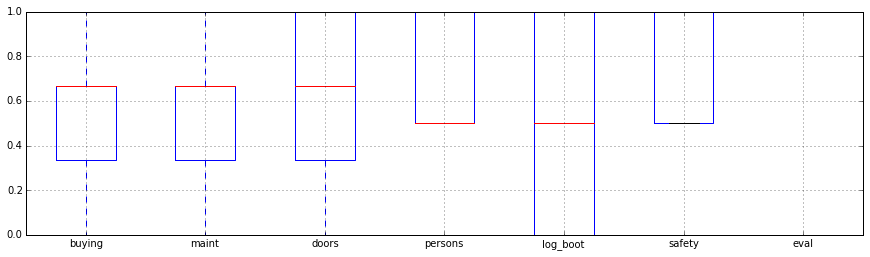

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

In [60]:
df_good.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,65.000000,65.000000,65.000000,65.000000,65.000000,65,65
mean,0.866667,0.733333,0.589744,0.769231,0.807692,1,2
std,0.164570,0.251385,0.352418,0.251199,0.245145,0,0
min,0.666667,0.333333,0.000000,0.500000,0.500000,1,2
25%,0.666667,0.666667,0.333333,0.500000,0.500000,1,2
50%,1.000000,0.666667,0.666667,1.000000,1.000000,1,2
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1,2
max,1.000000,1.000000,1.000000,1.000000,1.000000,1,2


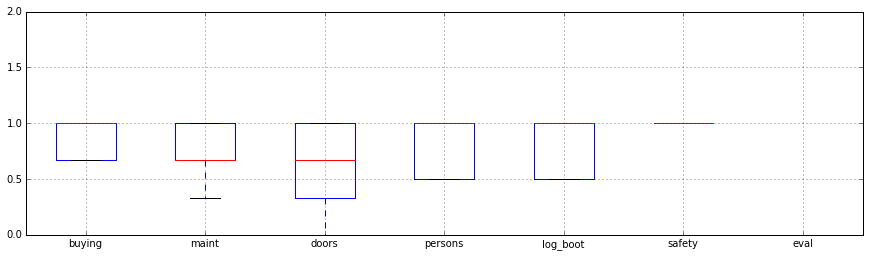

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

# 'eval'의 값 때문에 scale이 0.0 ~ 2.0으로 출력되는 것 같아 보임

In [62]:
df_vgood.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69
mean,0.888889,0.888889,0.521739,0.739130,0.521739,0.717391,3
std,0.158286,0.158286,0.368171,0.251593,0.406155,0.249680,0
min,0.666667,0.666667,0.000000,0.500000,0.000000,0.500000,3
25%,0.666667,0.666667,0.333333,0.500000,0.000000,0.500000,3
50%,1.000000,1.000000,0.666667,0.500000,0.500000,0.500000,3
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


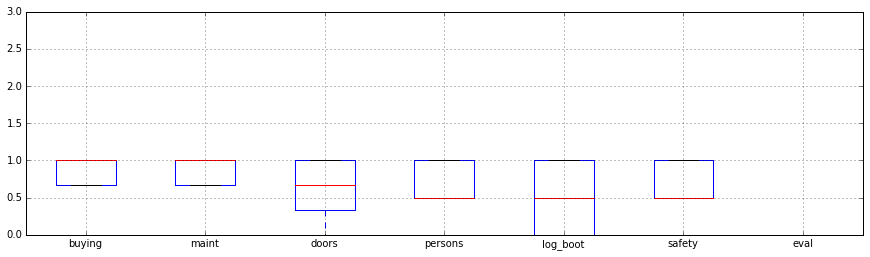

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

In [64]:
# Data input (scatter plot을 위한 재 정의 -> 위의 df는 normalized value이므로)
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names) 
    
#num_columns = df.shape[1]
map_dic = {}

for i in all_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    
    
# Target 별 gorupping
df_unacc = df[df['eval'] == 0]
df_acc = df[df['eval'] == 1]
df_good = df[df['eval'] == 2]
df_vgood = df[df['eval'] == 3]

In [65]:
# Mission 3: 속성들을 두 개씩 쌍을 지어 scatter plot
options = {}
for i in range(0, 15):
    options[i] = {}

k = 0;
for i in range(0, 5):
    for j in range(i+1, 6):
        options[k]['data_x'] = feature_names[i]
        options[k]['data_y'] = feature_names[j]
        options[k]['label_x'] = feature_names[i]
        options[k]['label_y'] = feature_names[j]
        options[k]['ylim_min'] = df[feature_names[j]].min() - 0.5
        options[k]['ylim_max'] = df[feature_names[j]].max() + 0.5
        k += 1
options

{0: {'data_x': 'buying',
  'data_y': 'maint',
  'label_x': 'buying',
  'label_y': 'maint',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 1: {'data_x': 'buying',
  'data_y': 'doors',
  'label_x': 'buying',
  'label_y': 'doors',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 2: {'data_x': 'buying',
  'data_y': 'persons',
  'label_x': 'buying',
  'label_y': 'persons',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 3: {'data_x': 'buying',
  'data_y': 'log_boot',
  'label_x': 'buying',
  'label_y': 'log_boot',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 4: {'data_x': 'buying',
  'data_y': 'safety',
  'label_x': 'buying',
  'label_y': 'safety',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 5: {'data_x': 'maint',
  'data_y': 'doors',
  'label_x': 'maint',
  'label_y': 'doors',
  'ylim_max': 3.5,
  'ylim_min': -0.5},
 6: {'data_x': 'maint',
  'data_y': 'persons',
  'label_x': 'maint',
  'label_y': 'persons',
  'ylim_max': 2.5,
  'ylim_min': -0.5},
 7: {'data_x': 'maint',
  'data_y': 'log_boot',
  'label_x': 'maint',
 

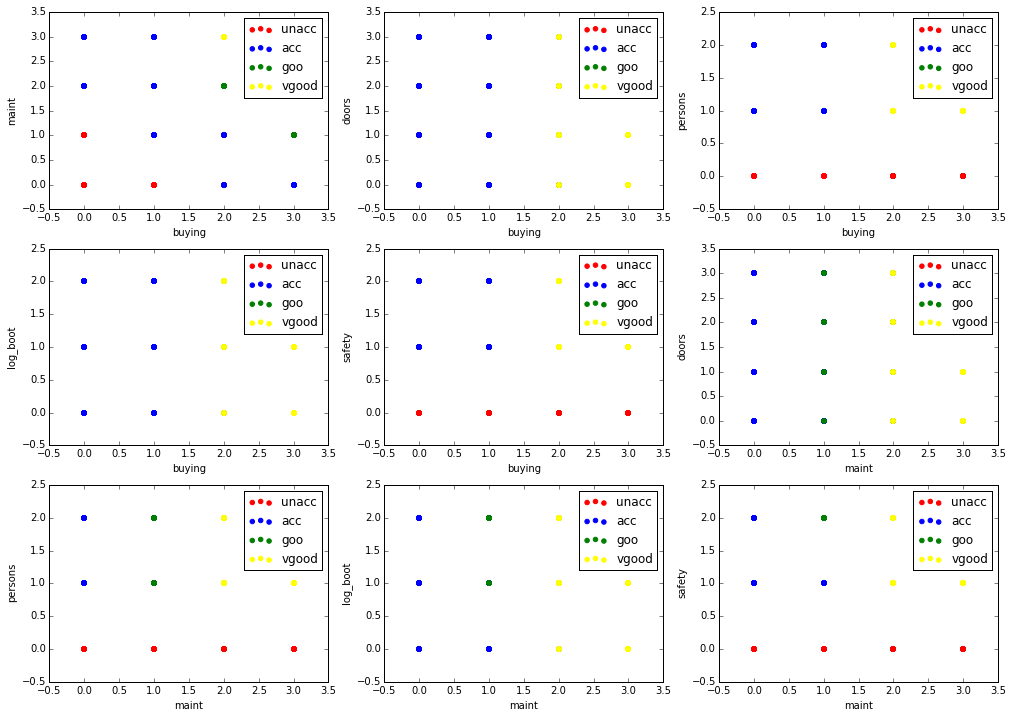

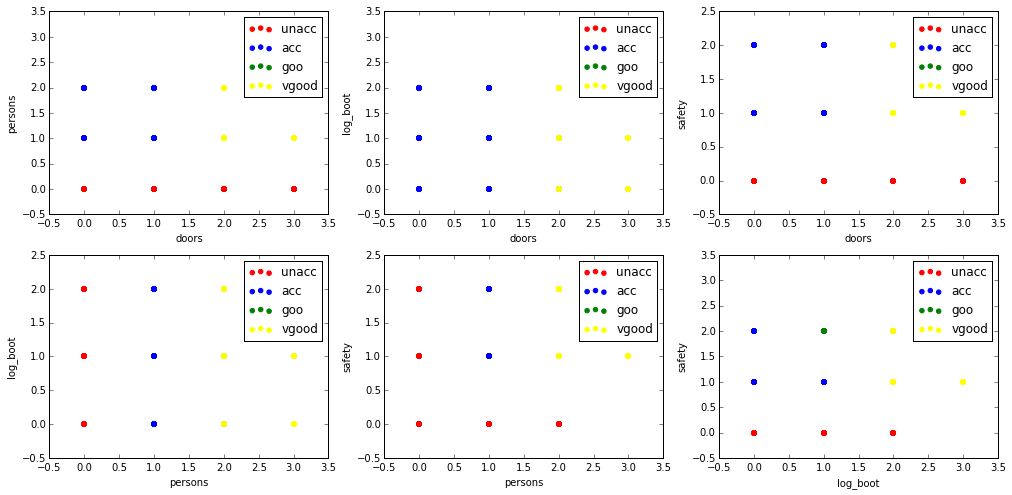

In [66]:
ax = []
fig = plt.figure(figsize = (17, 12))
for i in range(0, 9):
    ax.append(fig.add_subplot(330 + (i+1)))
    
for i in range(0, 9):
    unacc = ax[i].scatter(df_unacc[options[i]['data_x']], df_unacc[options[i]['data_y']], color = 'red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color = 'blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color = 'green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color = 'yellow')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), ('unacc', 'acc', 'goo', 'vgood'))

ax = []
fig = plt.figure(figsize = (17, 8))
for i in range(0, 6):
    ax.append(fig.add_subplot(230 + (i+1)))
    
for i in range(0, 6):
    unacc = ax[i].scatter(df_unacc[options[i + 9]['data_x']], df_unacc[options[i + 9]['data_y']], color = 'red')
    acc = ax[i].scatter(df_acc[options[i + 9]['data_x']], df_acc[options[i + 9]['data_y']], color = 'blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i + 9]['data_y']], color = 'green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i + 9]['data_y']], color = 'yellow')
    ax[i].set_xlabel(options[i + 9]['label_x'])
    ax[i].set_ylabel(options[i + 9]['label_y'])
    ax[i].set_ylim([options[i + 9]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((unacc, acc, good, vgood), ('unacc', 'acc', 'goo', 'vgood'))   

In [67]:
df2 = df.ix[:, 0:6]
df2

,buying,maint,doors,persons,log_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
5,0,0,0,0,1,2
6,0,0,0,0,2,0
7,0,0,0,0,2,1
8,0,0,0,0,2,2
9,0,0,0,1,0,0


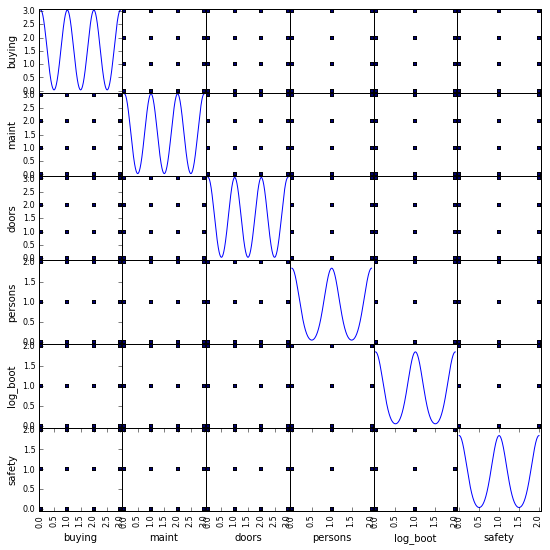

In [68]:
from pandas.tools.plotting import scatter_matrix
_= scatter_matrix(df2, figsize=(9, 9), diagonal='kde')

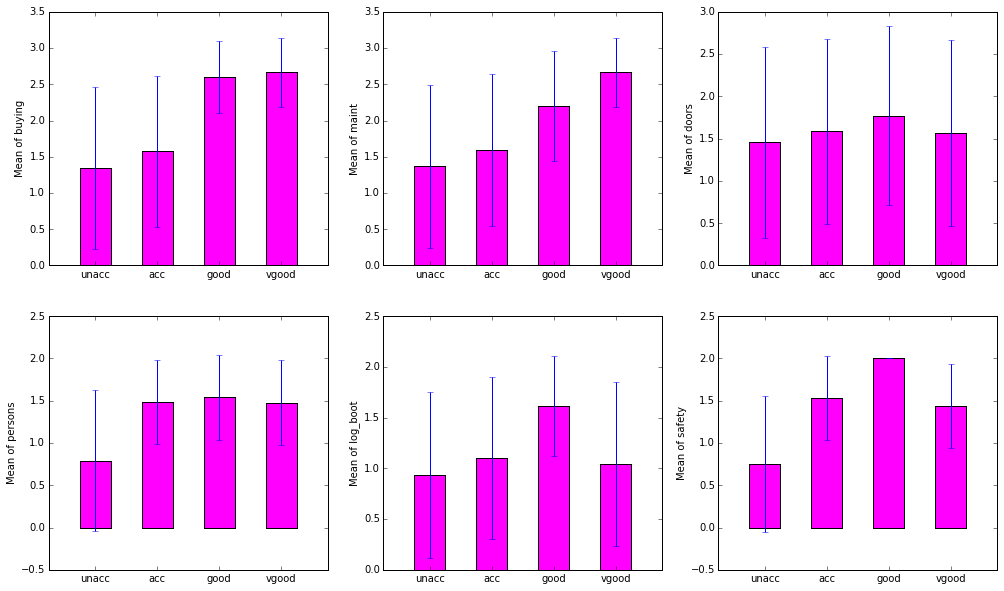

In [69]:
stats = {}
for i in range(0,6):
    stats[i] = {}
    stats[i]['mean'] = (df_unacc[feature_names[i]].mean(), 
                        df_acc[feature_names[i]].mean(), 
                        df_good[feature_names[i]].mean(),
                        df_vgood[feature_names[i]].mean())
    stats[i]['std'] = (df_unacc[feature_names[i]].std(), 
                       df_acc[feature_names[i]].std(),
                       df_good[feature_names[i]].std(),
                       df_vgood[feature_names[i]].std())
    
ind = Series([0.5, 1.5, 2.5, 3.5])
width = 0.5
fig = plt.figure(figsize=(17, 10))
ay = []
for i in range(0,6):
    ay.append(fig.add_subplot(230 + (i+1)))
    
for i in range(0,6):
    ay[i].bar(ind, stats[i]['mean'], 0.5, color='magenta', yerr=stats[i]['std'])
    ay[i].set_xlim([0, 4.5])
    ay[i].set_ylabel('Mean of ' + feature_names[i])
    ay[i].set_xticks(ind + width/2)
    ay[i].set_xticklabels(['unacc', 'acc', 'good', 'vgood'])

In [94]:
# 사전 만들기
df_per_attr = {}
for i in feature_names:
    df_per_attr[i] = {}
    groupby_df = df[[target_name, i]].groupby(i)   # 각각의 속성에 대해 grouping
    df_per_attr[i]['ngroups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [95]:
print df_per_attr['buying']['ngroups']

4


In [96]:
df_per_attr['buying']['subgroups'][0]

,eval,buying
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [97]:
df_per_attr['buying']['subgroups'][1]

,eval,buying
432,0,1
433,0,1
434,0,1
435,0,1
436,0,1
437,0,1
438,0,1
439,0,1
440,0,1
441,0,1


In [98]:
df_per_attr['safety']['subgroups'][1]

,eval,safety
1,0,1
4,0,1
7,0,1
10,0,1
13,0,1
16,0,1
19,0,1
22,0,1
25,0,1
28,0,1


In [99]:
# Mission 4: Entropy 산출

# Entropy function
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [100]:
labels = df['eval'].values
entropy(labels)

0.60287048500608764

In [107]:
df_per_attr['buying']['subgroups'][0].values

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [108]:
a = [item[0] for item in df_per_attr['buying']['subgroups'][0].values]
print a

entropy(a)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0.65002242164835411

In [101]:
# Mission 5: IG가 가장 높은 속성 산출
parent_size = float(len(df))
parent_size

1728.0

In [102]:
for i in feature_names:
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngroups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
            
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

buying
0.25 * 0.6500 = 0.1625
0.25 * 0.8113 = 0.2028
0.25 * 0.7024 = 0.1756
0.25 * 0.7855 = 0.1964
Information Gain: 0.6029 - 0.7373 = -0.1344

maint
0.25 * 0.6500 = 0.1625
0.25 * 0.6200 = 0.1550
0.25 * 0.7024 = 0.1756
0.25 * 0.7453 = 0.1863
Information Gain: 0.6029 - 0.6794 = -0.0766

doors
0.25 * 0.5267 = 0.1317
0.25 * 0.6059 = 0.1515
0.25 * 0.6350 = 0.1587
0.25 * 0.6350 = 0.1587
Information Gain: 0.6029 - 0.6006 = 0.0022

persons
0.33 * 0.0000 = 0.0000
0.33 * 0.7404 = 0.2468
0.33 * 0.7388 = 0.2463
Information Gain: 0.6029 - 0.4930 = 0.1098

log_boot
0.33 * 0.5679 = 0.1893
0.33 * 0.6280 = 0.2093
0.33 * 0.6856 = 0.2285
Information Gain: 0.6029 - 0.6271 = -0.0243

safety
0.33 * 0.0000 = 0.0000
0.33 * 0.7667 = 0.2556
0.33 * 0.8078 = 0.2693
Information Gain: 0.6029 - 0.5248 = 0.0781



In [103]:
import operator
information_gain_dict = {}

for i in feature_names:
    information_gain_dict[i] = df_per_attr[i]['information_gain']
    
information_gain_dict 

{'buying': -0.13443808367862886,
 'doors': 0.002242858313316054,
 'log_boot': -0.024277948325873711,
 'maint': -0.076564919618021809,
 'persons': 0.1098314816699541,
 'safety': 0.078058732848778067}

In [104]:
max(information_gain_dict.iteritems(), key = operator.itemgetter(1))

('persons', 0.1098314816699541)

In [115]:
# Mission 6: sklearn module -> Decision tree
from sklearn import tree

carevaldata = df.iloc[:, 0:6].values

In [116]:
carevaldata

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       ..., 
       [3, 3, 3, 2, 2, 0],
       [3, 3, 3, 2, 2, 1],
       [3, 3, 3, 2, 2, 2]], dtype=int64)

In [118]:
carevaltarget = df.iloc[:,6].values
carevaltarget

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [123]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(carevaldata, carevaltarget)

In [127]:
with open("careval.dot", 'w') as f:
    tree.export_graphviz(clf, out_file = f)

In [129]:
carevaldata[-1]

array([3, 3, 3, 2, 2, 2], dtype=int64)

In [130]:
clf.predict(carevaldata[-1])

array([2], dtype=int64)

In [131]:
clf.predict(carevaldata[-2])

array([3], dtype=int64)